In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats  # statistics
%matplotlib inline
df = pd.read_csv("clean_df.csv")
df.head()

,Unnamed: 0,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,horsepower-binned,diesel,gas,aspiration-std,aspiration-turbo
0,0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,5000.0,21,8.703704,16500.0,11.190476,Low,0,1,1,0
1,1,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,...,5000.0,19,9.038462,16500.0,12.368421,Medium,0,1,1,0
2,2,2,164,audi,four,sedan,fwd,front,99.8,0.848630,...,5500.0,24,7.833333,13950.0,9.791667,Low,0,1,1,0
3,3,2,164,audi,four,sedan,4wd,front,99.4,0.848630,...,5500.0,18,10.681818,17450.0,13.055556,Low,0,1,1,0
4,4,2,122,audi,two,sedan,fwd,front,99.8,0.851994,...,5500.0,19,9.400000,15250.0,12.368421,Low,0,1,1,0


(0.0, 53512.193378358934)

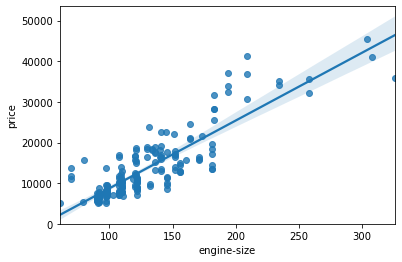

In [2]:
# Positive Linear Relationship = Positive Correlation
sns.regplot(x="engine-size", y="price", data = df)
plt.ylim(0,)

(0.0, 48253.73369615493)

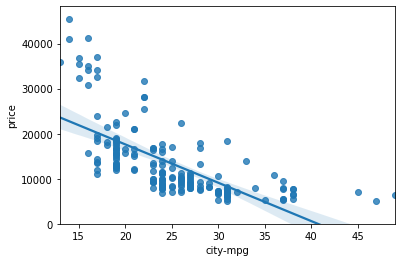

In [3]:
# Negative Linear Relationship = Negative Correlation
sns.regplot(x="city-mpg", y="price", data=df)
plt.ylim(0,)

(0.0, 47414.1)

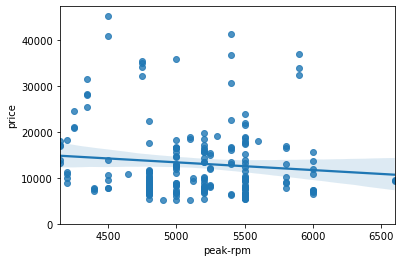

In [4]:
# Weak Linear Relationship = Weak Correlation
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

(0.0, 47536.741149362635)

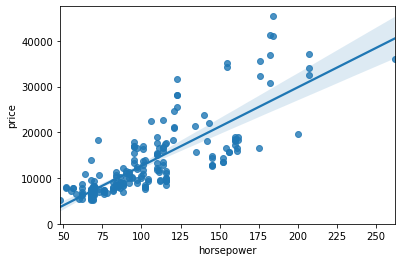

In [5]:
sns.regplot(x="horsepower", y="price", data=df)
plt.ylim(0,)

In [6]:
Pearson_coef, P_value = stats.pearsonr(df["horsepower"], df["price"])
print(f"Pearson_coef:{Pearson_coef}, Close to 1, Strong positive correlation")
print(f"p_value:{P_value} Very small, more than,001, Strong certainty in pearson_coeff")

Pearson_coef:0.8096565575365611, Close to 1, Strong positive correlation
p_value:1.0468839625927006e-47 Very small, more than,001, Strong certainty in pearson_coeff


In [7]:
df[['bore','stroke' ,'compression-ratio','horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.051087,0.002034,0.566807
stroke,-0.051087,1.000000,0.186780,0.100881
compression-ratio,0.002034,0.186780,1.000000,-0.214260
horsepower,0.566807,0.100881,-0.214260,1.000000


In [8]:
# Continuous numerical variables: A great way to visualize these variables is by
#using scatterplots with fitted lines.

# Categorical variables

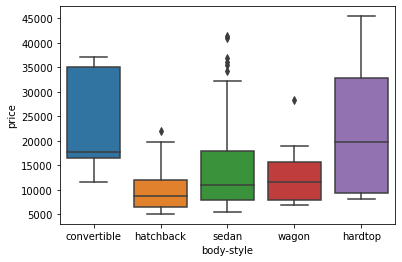

In [9]:
# boxplot is the good way to visulize categorical variables
sns.boxplot(x='body-style', y='price', data = df)
#We see that the distributions of price between the different body-style categories have a significant overlap, 
#and so body-style would not be a good predictor of price. Let's examine engine "engine-location" and "price":

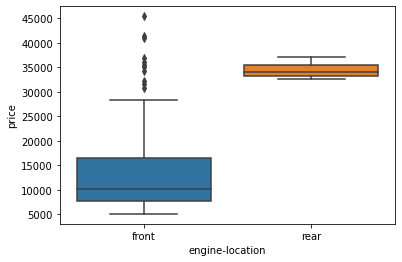

In [10]:
sns.boxplot(x='engine-location', y='price', data = df)
#Here we see that the distribution of price between these two engine-location categories, 
#front and rear, are distinct enough to take engine-location as a potential good predictor of price

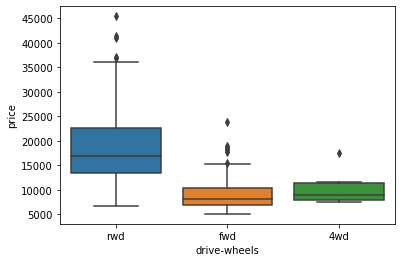

In [11]:
sns.boxplot(x='drive-wheels', y='price', data = df)
#ere we see that the distribution of price between the different drive-wheels
#categories differs; as such drive-wheels could potentially be a predictor of price.

In [12]:
#Categorical Descriptive Analysis
df.describe(include=['object'])

,make,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,200,200,200,200,200,200,200,200,200
unique,22,2,5,3,2,6,7,8,3
top,toyota,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,115,94,118,197,145,156,91,152


In [13]:
# a good way of understanding how many units of each characteristic/variable
df['drive-wheels'].value_counts()

fwd    118
rwd     74
4wd      8
Name: drive-wheels, dtype: int64

In [14]:
# Convert the series to Dataframe
df['drive-wheels'].value_counts().to_frame()

,drive-wheels
fwd,118
rwd,74
4wd,8


In [15]:
df['drive-wheels'].unique() 

array(['rwd', 'fwd', '4wd'], dtype=object)

In [16]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [17]:
X = df[['city-mpg']]
Y = df['price']
lm.fit(X,Y)

LinearRegression()

In [18]:
lm.intercept_

34653.84213990768

In [19]:
lm.coef_

array([-851.11714841])

 ### price = 34653.8 - 851 * city-mpg

In [20]:
lm.fit(df[['engine-size']], df['price'])

LinearRegression()

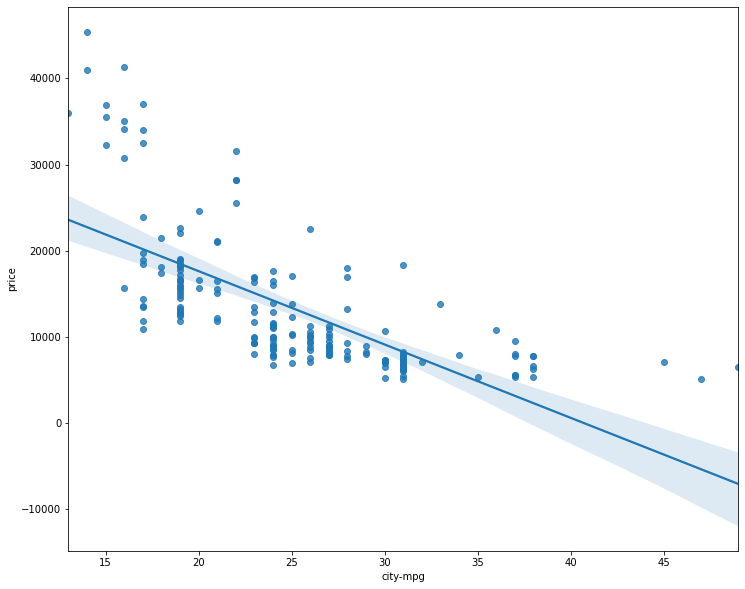

In [21]:
plt.figure(figsize=(12,10))
sns.regplot(x='city-mpg', y='price', data = df)

In [22]:
# city-mpg is more strongly correlated with "price"
df[['peak-rpm', 'city-mpg','price']].corr()

,peak-rpm,city-mpg,price
peak-rpm,1.000000,-0.116364,-0.101593
city-mpg,-0.116364,1.000000,-0.687186
price,-0.101593,-0.687186,1.000000


In [23]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [42]:
x = df['city-mpg']
y = df['price']

In [43]:
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3       2
-2.656 x + 286 x - 1.017e+04 x + 1.273e+05


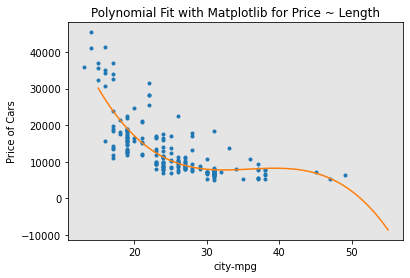

In [44]:
PlotPolly(p, x, y, 'city-mpg')

In [45]:
np.polyfit(x, y, 3)

array([-2.65643712e+00,  2.86047279e+02, -1.01681070e+04,  1.27261330e+05])

In [46]:
from sklearn.metrics import r2_score
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.6587631726692724


In [47]:
from sklearn.metrics import mean_squared_error
mean_squared_error(df['price'], p(x))

21550964.371089477